# Medical Examiner Case Archive

> This contains information about deaths that occurred in Cook County that were under the Medical Examiner’s jurisdiction. Not all deaths that occur in Cook County are reported to the Medical Examiner or fall under the jurisdiction of the Medical Examiner. The Medical Examiner’s Office determines cause and manner of death for those cases that fall under its jurisdiction. Cause of death describes the reason the person died. This dataset includes information from deaths starting in August 2014 to the present, with information updated daily.

Data source is [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86/data). Filename is `Medical_Examiner_Case_Archive.csv`.

## Our goals

* Cleaning up column names
* Display options
* Regular expressions
* Dates and times

In [1]:
!ls

01-NEISS_(merging,dates,times).ipynb
02-Medical_Examiner_Case_Archive(displayoptions_regex_dates_times).ipynb
03-Credit_cards_(scraping_downloading_globbing_combining).ipynb
Medical_Examiner_Case_Archive.csv
neiss2021-fixed.xlsx


In [29]:
#! pip install altair
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import altair as alt

In [30]:
import pandas as pd
df = pd.read_csv("Medical_Examiner_Case_Archive.csv")
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

df.head()

/var/folders/z4/gtqzrf5n5wd4n_kq0jll0wfc0000gn/T/ipykernel_84166/106838191.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Medical_Examiner_Case_Archive.csv")


,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Cold Related,Heat Related,Commissioner District,Incident Address,Incident City,Incident Zip Code,longitude,latitude,location,Residence City,Residence Zip,OBJECTID,Chicago Ward,Chicago Community Area,COVID Related
0,ME2020-05711,05/15/2020 06:00:00 PM,05/15/2020 10:52:00 PM,67.0,Female,White,False,PENDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,"O'Hare, 10000 W. O'Hare Avenue",CHICAGO,60666,NaN,NaN,NaN,NaN,NaN,38479,NaN,NaN,NaN
1,ME2015-02036,NaN,05/18/2015 11:30:00 AM,NaN,Female,Unknown,False,NATURAL,UNDETERMINED NATURAL CAUSES,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,False
2,ME2015-04003,NaN,NaN,NaN,NaN,NaN,False,NaN,NONHUMAN REMAINS,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121,NaN,NaN,False
3,ME2014-01313,11/04/2014 08:34:00 PM,11/04/2014 09:17:00 PM,20.0,Male,White,False,ACCIDENT,ANAPHYLACTIC REACTION,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glenview,60026,249,NaN,NaN,False
4,ME2014-02102,12/21/2014 11:00:00 PM,12/26/2014 09:48:00 PM,34.0,Male,White,False,ACCIDENT,"COMBINED DRUG (OPIATE, COCAINE, BENZODIAZEPINE) TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,NaN,WEST MONTROSE AND NORTH PULASKI IN CHICAGO,NaN,NaN,NaN,NaN,NaN,Lansing,60438,308,NaN,NaN,False


In [31]:
# We want to clean up our column names

df.columns

# We can treat the list the same way as a column

# making it lower case
df.columns.str.lower()

# and replace the spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ","_")
df

# It would be a good idea to run this every time you work with a new data frame

,case_number,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_address,incident_city,incident_zip_code,longitude,latitude,location,residence_city,residence_zip,objectid,chicago_ward,chicago_community_area,covid_related
0,ME2020-05711,05/15/2020 06:00:00 PM,05/15/2020 10:52:00 PM,67.0,Female,White,False,PENDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,"O'Hare, 10000 W. O'Hare Avenue",CHICAGO,60666,NaN,NaN,NaN,NaN,NaN,38479,NaN,NaN,NaN
1,ME2015-02036,NaN,05/18/2015 11:30:00 AM,NaN,Female,Unknown,False,NATURAL,UNDETERMINED NATURAL CAUSES,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,False
2,ME2015-04003,NaN,NaN,NaN,NaN,NaN,False,NaN,NONHUMAN REMAINS,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121,NaN,NaN,False
3,ME2014-01313,11/04/2014 08:34:00 PM,11/04/2014 09:17:00 PM,20.0,Male,White,False,ACCIDENT,ANAPHYLACTIC REACTION,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glenview,60026,249,NaN,NaN,False
4,ME2014-02102,12/21/2014 11:00:00 PM,12/26/2014 09:48:00 PM,34.0,Male,White,False,ACCIDENT,"COMBINED DRUG (OPIATE, COCAINE, BENZODIAZEPINE) TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,NaN,WEST MONTROSE AND NORTH PULASKI IN CHICAGO,NaN,NaN,NaN,NaN,NaN,Lansing,60438,308,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70729,ME2021-09161,09/28/2021 12:00:00 AM,09/30/2021 04:27:00 PM,90.0,Male,Black,False,NATURAL,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,PNEUMONIA,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,False,False,False,False,1.0,5258 WEST HARRISON STREET,CHICAGO,60644,-87.757137,41.873158,"(41.87315829, -87.75713736)",Chicago,60644.0,58050,29.0,AUSTIN,True
70730,ME2022-03098,02/12/2022 09:00:00 AM,02/12/2022 06:14:00 PM,84.0,Male,White,False,NATURAL,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,NaN,HYPERTENSION; DIABETES MELLITUS; VALVULAR HEART DISEASE; ATRIAL FIBRILLATION,False,False,False,False,14.0,730 W Hintz Rd,WHEELING,60090,-87.935127,42.124934,"(42.12493375, -87.93512654)",Lincolnshire,60069.0,64602,NaN,NaN,True
70731,ME2022-03032,02/10/2022 10:42:00 PM,02/10/2022 10:50:00 PM,43.0,Male,White,False,ACCIDENT,FENTANYL TOXICITY,NaN,NaN,NaN,NaN,False,True,False,False,10.0,"5216 N Magnolia Ave, Apt 2",CHICAGO,60640,-87.661459,41.976883,"(41.97688328, -87.6614587)",Chicago,60640.0,64523,48.0,EDGEWATER,False
70732,ME2021-10979,11/27/2021 01:50:00 AM,11/27/2021 02:02:00 AM,55.0,Male,Black,False,ACCIDENT,"COMBINED COCAINE, FENTANYL, AND GABAPENTIN TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,2.0,3001 W. Jackson,CHICAGO,60612,-87.701258,41.877119,"(41.87711926, -87.70125841)",Chicago,60629.0,59849,28.0,EAST GARFIELD PARK,False


In [32]:
df.dtypes

case_number                object
date_of_incident           object
date_of_death              object
age                       float64
gender                     object
race                       object
latino                       bool
manner_of_death            object
primary_cause              object
primary_cause_line_a       object
primary_cause_line_b       object
primary_cause_line_c       object
secondary_cause            object
gun_related                object
opioid_related             object
cold_related                 bool
heat_related                 bool
commissioner_district     float64
incident_address           object
incident_city              object
incident_zip_code          object
longitude                 float64
latitude                  float64
location                   object
residence_city             object
residence_zip              object
objectid                    int64
chicago_ward              float64
chicago_community_area     object
covid_related 

In [33]:
# Convert the date_of_death to a datetime type
df['death_datetime'] = pd.to_datetime(df.date_of_death)
df

,case_number,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_address,incident_city,incident_zip_code,longitude,latitude,location,residence_city,residence_zip,objectid,chicago_ward,chicago_community_area,covid_related,death_datetime
0,ME2020-05711,05/15/2020 06:00:00 PM,05/15/2020 10:52:00 PM,67.0,Female,White,False,PENDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,"O'Hare, 10000 W. O'Hare Avenue",CHICAGO,60666,NaN,NaN,NaN,NaN,NaN,38479,NaN,NaN,NaN,2020-05-15 22:52:00
1,ME2015-02036,NaN,05/18/2015 11:30:00 AM,NaN,Female,Unknown,False,NATURAL,UNDETERMINED NATURAL CAUSES,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,False,2015-05-18 11:30:00
2,ME2015-04003,NaN,NaN,NaN,NaN,NaN,False,NaN,NONHUMAN REMAINS,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121,NaN,NaN,False,NaT
3,ME2014-01313,11/04/2014 08:34:00 PM,11/04/2014 09:17:00 PM,20.0,Male,White,False,ACCIDENT,ANAPHYLACTIC REACTION,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glenview,60026,249,NaN,NaN,False,2014-11-04 21:17:00
4,ME2014-02102,12/21/2014 11:00:00 PM,12/26/2014 09:48:00 PM,34.0,Male,White,False,ACCIDENT,"COMBINED DRUG (OPIATE, COCAINE, BENZODIAZEPINE) TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,NaN,WEST MONTROSE AND NORTH PULASKI IN CHICAGO,NaN,NaN,NaN,NaN,NaN,Lansing,60438,308,NaN,NaN,False,2014-12-26 21:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70729,ME2021-09161,09/28/2021 12:00:00 AM,09/30/2021 04:27:00 PM,90.0,Male,Black,False,NATURAL,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,PNEUMONIA,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,False,False,False,False,1.0,5258 WEST HARRISON STREET,CHICAGO,60644,-87.757137,41.873158,"(41.87315829, -87.75713736)",Chicago,60644.0,58050,29.0,AUSTIN,True,2021-09-30 16:27:00
70730,ME2022-03098,02/12/2022 09:00:00 AM,02/12/2022 06:14:00 PM,84.0,Male,White,False,NATURAL,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,NaN,HYPERTENSION; DIABETES MELLITUS; VALVULAR HEART DISEASE; ATRIAL FIBRILLATION,False,False,False,False,14.0,730 W Hintz Rd,WHEELING,60090,-87.935127,42.124934,"(42.12493375, -87.93512654)",Lincolnshire,60069.0,64602,NaN,NaN,True,2022-02-12 18:14:00
70731,ME2022-03032,02/10/2022 10:42:00 PM,02/10/2022 10:50:00 PM,43.0,Male,White,False,ACCIDENT,FENTANYL TOXICITY,NaN,NaN,NaN,NaN,False,True,False,False,10.0,"5216 N Magnolia Ave, Apt 2",CHICAGO,60640,-87.661459,41.976883,"(41.97688328, -87.6614587)",Chicago,60640.0,64523,48.0,EDGEWATER,False,2022-02-10 22:50:00
70732,ME2021-10979,11/27/2021 01:50:00 AM,11/27/2021 02:02:00 AM,55.0,Male,Black,False,ACCIDENT,"COMBINED COCAINE, FENTANYL, AND GABAPENTIN TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,2.0,3001 W. Jackson,CHICAGO,60612,-87.701258,41.877119,"(41.87711926, -87.70125841)",Chicago,60629.0,59849,28.0,EAST GARFIELD PARK,False,2021-11-27 02:02:00


In [37]:
df.death_datetime.dt.day_of_week.value_counts().sort_index()

0.0    10560
1.0    10062
2.0     9854
3.0     9629
4.0    10186
5.0    10066
6.0    10314
Name: death_datetime, dtype: int64

<AxesSubplot: >

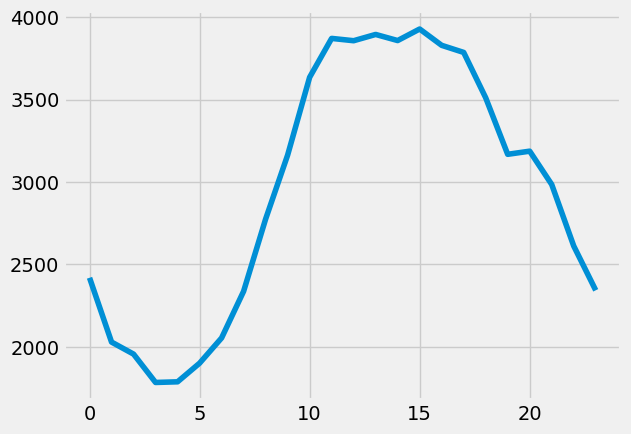

In [38]:
df.death_datetime.dt.hour.value_counts().sort_index().plot()

<AxesSubplot: >

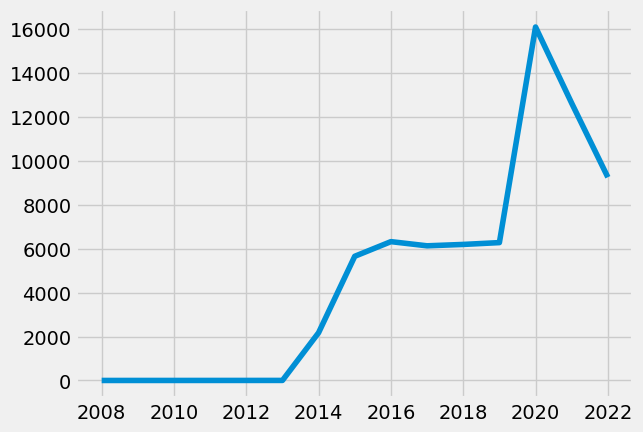

In [39]:
df.death_datetime.dt.year.value_counts().sort_index().plot()

<AxesSubplot: >

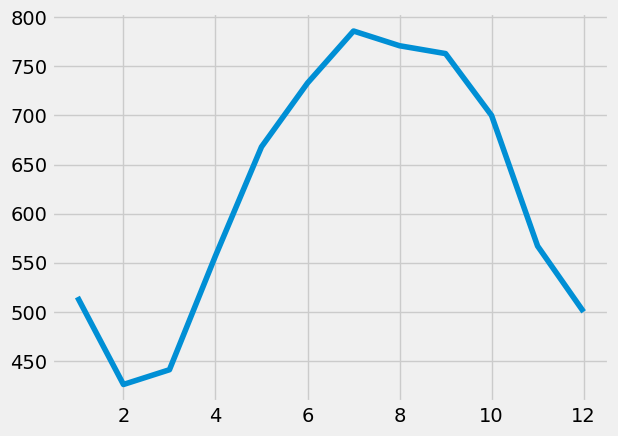

In [40]:

df[df.gun_related == True].death_datetime.dt.month.value_counts().sort_index().plot()

In [ ]:
# But there is another thing we might want to do:
# Group based on month and year...

<AxesSubplot: xlabel='death_datetime'>

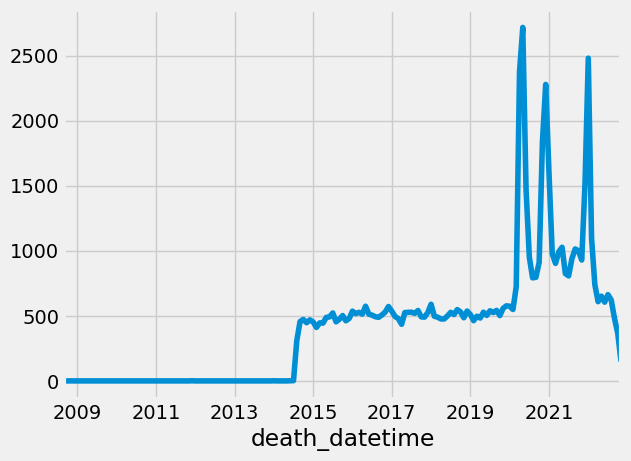

In [45]:
df.resample("M", on='death_datetime').gun_related.count().plot()

# Resample is specific for datetime variables/columns!
# Put W in the place of M and you get it on a weekly basis. Y gives you years.

In [46]:
# Looks like the data from before 2014 is pretty poor – seems unlikely that noone died. Or that they didn't 
# registre the time


df[df.death_datetime > '2014-04']

,case_number,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_address,incident_city,incident_zip_code,longitude,latitude,location,residence_city,residence_zip,objectid,chicago_ward,chicago_community_area,covid_related,death_datetime
0,ME2020-05711,05/15/2020 06:00:00 PM,05/15/2020 10:52:00 PM,67.0,Female,White,False,PENDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,"O'Hare, 10000 W. O'Hare Avenue",CHICAGO,60666,NaN,NaN,NaN,NaN,NaN,38479,NaN,NaN,NaN,2020-05-15 22:52:00
1,ME2015-02036,NaN,05/18/2015 11:30:00 AM,NaN,Female,Unknown,False,NATURAL,UNDETERMINED NATURAL CAUSES,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,False,2015-05-18 11:30:00
3,ME2014-01313,11/04/2014 08:34:00 PM,11/04/2014 09:17:00 PM,20.0,Male,White,False,ACCIDENT,ANAPHYLACTIC REACTION,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glenview,60026,249,NaN,NaN,False,2014-11-04 21:17:00
4,ME2014-02102,12/21/2014 11:00:00 PM,12/26/2014 09:48:00 PM,34.0,Male,White,False,ACCIDENT,"COMBINED DRUG (OPIATE, COCAINE, BENZODIAZEPINE) TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,NaN,WEST MONTROSE AND NORTH PULASKI IN CHICAGO,NaN,NaN,NaN,NaN,NaN,Lansing,60438,308,NaN,NaN,False,2014-12-26 21:48:00
5,ME2015-02998,07/15/2015 08:30:00 PM,07/15/2015 11:47:00 PM,72.0,Male,White,True,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chicago,60616,381,NaN,NaN,False,2015-07-15 23:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70729,ME2021-09161,09/28/2021 12:00:00 AM,09/30/2021 04:27:00 PM,90.0,Male,Black,False,NATURAL,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,PNEUMONIA,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,False,False,False,False,1.0,5258 WEST HARRISON STREET,CHICAGO,60644,-87.757137,41.873158,"(41.87315829, -87.75713736)",Chicago,60644.0,58050,29.0,AUSTIN,True,2021-09-30 16:27:00
70730,ME2022-03098,02/12/2022 09:00:00 AM,02/12/2022 06:14:00 PM,84.0,Male,White,False,NATURAL,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,NaN,NaN,HYPERTENSION; DIABETES MELLITUS; VALVULAR HEART DISEASE; ATRIAL FIBRILLATION,False,False,False,False,14.0,730 W Hintz Rd,WHEELING,60090,-87.935127,42.124934,"(42.12493375, -87.93512654)",Lincolnshire,60069.0,64602,NaN,NaN,True,2022-02-12 18:14:00
70731,ME2022-03032,02/10/2022 10:42:00 PM,02/10/2022 10:50:00 PM,43.0,Male,White,False,ACCIDENT,FENTANYL TOXICITY,NaN,NaN,NaN,NaN,False,True,False,False,10.0,"5216 N Magnolia Ave, Apt 2",CHICAGO,60640,-87.661459,41.976883,"(41.97688328, -87.6614587)",Chicago,60640.0,64523,48.0,EDGEWATER,False,2022-02-10 22:50:00
70732,ME2021-10979,11/27/2021 01:50:00 AM,11/27/2021 02:02:00 AM,55.0,Male,Black,False,ACCIDENT,"COMBINED COCAINE, FENTANYL, AND GABAPENTIN TOXICITY",NaN,NaN,NaN,NaN,False,True,False,False,2.0,3001 W. Jackson,CHICAGO,60612,-87.701258,41.877119,"(41.87711926, -87.70125841)",Chicago,60629.0,59849,28.0,EAST GARFIELD PARK,False,2021-11-27 02:02:00


<AxesSubplot: xlabel='death_datetime'>

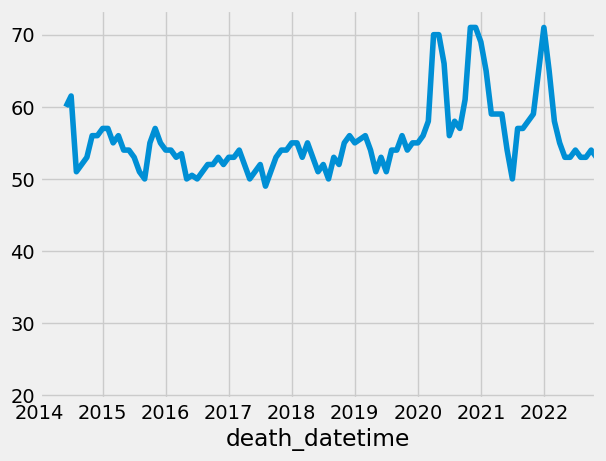

In [54]:
df[df.death_datetime > '2014'].resample("M", on='death_datetime').age.median().plot()

In [57]:
# Regular expressions :'(

gun_df = df[df.gun_related == True]

# Here we examine where in the body people are shot
gun_df.primary_cause.value_counts()

MULTIPLE GUNSHOT WOUNDS                    3522
GUNSHOT WOUND OF HEAD                       962
GUNSHOT WOUND OF THE HEAD                   342
GUNSHOT WOUND OF CHEST                      269
GUNSHOT WOUND TO THE HEAD                   166
                                           ... 
SUBMENTAL GUNSHOT WOUND OF THE HEAD           1
GUNSHOT WOUND OF RIGHT HIP INTO ABDOMEN       1
GUNSHOT WOUND OF  HEAD                        1
GUNSHOT WOUND OF THE EYE                      1
GUNSHOT WOUND(S) OF TORSO                     1
Name: primary_cause, Length: 367, dtype: int64

### But that is messy - how do we clean it?

There are two techniques: **regular expressions** and **the secret lazy way**.

Regular expressions:
- tests select what we are interested in

The secret lazy way:
- lets get rid of the information we are not interested in.

In [66]:
# Manual data cleaning is clear but it takes some time + a lot of code
gun_df.primary_cause.str.replace("GUNSHOT WOUND OF ","")\
.str.replace("THE ","").str.replace("GUNSHOT WOUND TO ","").\
str.replace("GUNSHOT WOUND","").value_counts().head(20)

MULTIPLE S                     3522
HEAD                           1626
CHEST                           527
BACK                            289
TORSO                           180
NECK                            131
ABDOMEN                         122
COMPLICATIONS OF MULTIPLE S      93
INTRAORAL                        87
INTRAORAL HEAD                   53
FACE                             47
COMPLICATIONS OF HEAD            42
MULTIPLE S OF HEAD               40
INTRA-ORAL                       18
COMPLICATIONS OF REMOTE          17
MOUTH                            16
BUTTOCK                          15
CHIN                             15
LEFT ARM INTO CHEST              15
ARM                              15
Name: primary_cause, dtype: int64

In [68]:
# It is much cleaner to use regular expressions – but it is less easy to read...
gun_df.primary_cause.str.extract("GUNSHOT WOUND OF (.*)")

,0
12,NaN
31,HEAD
32,NaN
33,THE CHIN
37,NaN
...,...
70675,THE HEAD
70678,NaN
70695,HEAD
70700,NaN
